In [1]:
# # Install TensorFlow
# !pip install tensorflow

# # Install pandas
# !pip install pandas

# # Install matplotlib
# !pip install matplotlib


# # Install FastAPI
# !pip install fastapi

# # Install uvicorn
# !pip install uvicorn

# tf.version.VERSION

# from google.colab import drive
# drive.mount('/content/drive')

# !nvidia-smi


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import random
import pandas as pd

In [6]:
BATCH_SIZE = 32 # batch size of images
IMAGE_SIZE = 256 #individuak image is 256 x 256
CHANNELS = 3 #r,g, b channels
EPOCHS = 30 #trail and error to see epoch give better accuracy

In [7]:
pepper_data_path = '../Pepper'
pepper_models_path = '../saved_models'


In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    pepper_data_path,
    shuffle = True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2484 files belonging to 2 classes.


In [9]:
len(dataset)

78

In [ ]:
# dataset_rev = random.sample(dataset, 200)

In [ ]:
# len(dataset_rev)

In [10]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

(32, 256, 256, 3)
[0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0]


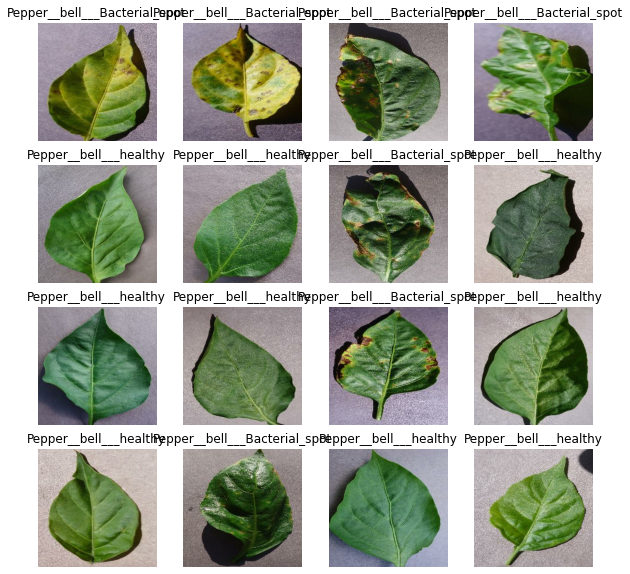

In [11]:
# dataset.take(1) returns batch size, image size, channels through first returned value
# dataset.take(1) returns labels of batch through second returned value
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
# 80% Training
# 20% test
    # 10% Validation
    # 10% Test

In [ ]:
# # 80% Training
# train_size = 0.8
# train_len = int(len(dataset)*train_size)
# train_ds = dataset.take(train_len)
# len(train_ds)

In [ ]:
# # 20% test
# test_ds = dataset.skip(train_len)
# len(test_ds)
# # 10% Validation
# val_size = 0.1 
# val_len = int(len(dataset)*val_size)
# val_ds = test_ds.take(val_len)

# # 10% Test
# test_ds = test_ds.skip(val_len)

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
    assert(train_split+test_split+val_split) ==1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    # 80% Training
    train_ds = ds.take(train_size)
    # 20% test
        # 10% Validation
        # 10% Test
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
            
    return train_ds, val_ds, test_ds


In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [13]:
len(train_ds)

62

In [14]:
new_train_ds = train_ds.take(100)

In [ ]:
len(new_train_ds)

100

In [67]:
len(val_ds)

7

In [ ]:
new_val_ds = val_ds.take(13)

In [68]:
len(new_val_ds)

NameError: ignored

In [69]:
len(test_ds)

9

In [ ]:
new_test_ds = test_ds.take(13)

In [ ]:
len(new_test_ds)

13

Cache, Shuffle, and Prefetch the Dataset

In [14]:
# By train cache, model trains, it keeps the images in memory and it would save the time to load from disk.
#shuffling, becuase by randomizing the batch, perfomance would be better.
#prefatch is used for performance tunning. It can imporove performance.
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)
    

[[[0.6039216  0.54901963 0.54509807]
  [0.6117647  0.5568628  0.5529412 ]
  [0.5882353  0.53333336 0.5294118 ]
  ...
  [0.6627451  0.60784316 0.60784316]
  [0.61960787 0.5647059  0.5647059 ]
  [0.6313726  0.5764706  0.5764706 ]]

 [[0.6745098  0.61960787 0.6156863 ]
  [0.72156864 0.6666667  0.6627451 ]
  [0.654902   0.6        0.59607846]
  ...
  [0.65882355 0.6039216  0.6039216 ]
  [0.62352943 0.5686275  0.5686275 ]
  [0.64705884 0.5921569  0.5921569 ]]

 [[0.50980395 0.45490196 0.4509804 ]
  [0.6392157  0.58431375 0.5803922 ]
  [0.63529414 0.5803922  0.5764706 ]
  ...
  [0.65882355 0.6039216  0.6039216 ]
  [0.63529414 0.5803922  0.5803922 ]
  [0.6666667  0.6117647  0.6117647 ]]

 ...

 [[0.6784314  0.6313726  0.6313726 ]
  [0.7019608  0.654902   0.654902  ]
  [0.6313726  0.58431375 0.58431375]
  ...
  [0.58431375 0.5254902  0.54509807]
  [0.61960787 0.56078434 0.5803922 ]
  [0.61960787 0.56078434 0.5803922 ]]

 [[0.627451   0.5803922  0.5803922 ]
  [0.62352943 0.5764706  0.5764706 ]


# **Model Building**

**Creating a Layer for Resizing and Normalization**


Before using images as input for a machine learning model, it is often necessary to resize and normalize them. Resizing can be helpful if the model expects a certain size of input image, and normalization can improve model performance by scaling the pixel values to a specific range (such as between 0 and 1). These preprocessing steps can be added as a layer in the model, which means they will be applied both during training and when using the model for predictions. 

By adding a resize and normalization layer to the model, we can ensure that any images that are used as input will be automatically resized and normalized to the desired size and range, even if they are not in the correct size or format originally. This can be especially useful when using the model for predictions, as it allows us to easily process images of any size and format.

In [16]:
# Normalizing the images to be between 0 and 1.
# It is a layer.
resize_and_rescale = tf.keras.Sequential([
    # Resizing this, becuase image might not be 256 x 256 before adding to production,
    #sometime model resize it, so we do it again to reset.
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    # By passing this, model architecture of tensorflow will devide the layer by 255
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

**Data Augmentation**

Data augmentation is a way to increase the size of a dataset by generating modified versions of the existing data. This can improve the accuracy of a machine learning model when we have a small dataset. Data augmentation is achieved by applying transformations to the data, such as rotating, flipping, cropping, or adding noise. By using data augmentation, we can often achieve better model performance with a small dataset.

In [17]:
# Data augmentation is used to account usecases where Image are rotated, zoomed, fliped, contrast etc.. 
# We can trasnform the image to additional images with mentioned usecases.

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])


tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), groups=1,
    activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)

**Model Architecture**

In [20]:
#32 is decided after so train and error for optimal filters.
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 2
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'), #number of nuerons is 64
    layers.Dense(num_classes, activation='softmax'), # normalizing the probability
])
model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1, # so it can print more information in output
    epochs=EPOCHS
)

Epoch 1/30
62/62 [==============================] - 88s 1s/step - loss: 0.7572 - accuracy: 0.6034 - val_loss: 0.7013 - val_accuracy: 0.5714
Epoch 2/30
62/62 [==============================] - 80s 1s/step - loss: 0.4083 - accuracy: 0.8301 - val_loss: 0.4233 - val_accuracy: 0.8259
Epoch 3/30
62/62 [==============================] - 77s 1s/step - loss: 0.2312 - accuracy: 0.9077 - val_loss: 1.0817 - val_accuracy: 0.5982
Epoch 4/30
62/62 [==============================] - 73s 1s/step - loss: 0.1783 - accuracy: 0.9346 - val_loss: 0.2463 - val_accuracy: 0.8839
Epoch 5/30
62/62 [==============================] - 74s 1s/step - loss: 0.1242 - accuracy: 0.9564 - val_loss: 0.4055 - val_accuracy: 0.7946
Epoch 6/30
62/62 [==============================] - 72s 1s/step - loss: 0.0718 - accuracy: 0.9792 - val_loss: 0.1694 - val_accuracy: 0.9688
Epoch 7/30
62/62 [==============================] - 80s 1s/step - loss: 0.0527 - accuracy: 0.9873 - val_loss: 0.3958 - val_accuracy: 0.8304
Epoch 8/30
62/62 [==

KeyboardInterrupt: 

**Plotting the Accuracy and Loss Curves**

In [ ]:
scores = model.evaluate(test_ds)
scores

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Run prediction on a sample image**


In [ ]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
  sample_image = images_batch[10].numpy().astype("uint8")


  print("Sample image to predict")
  plt.imshow(sample_image)
  actual_label = labels_batch[10].numpy()

  batch_prediction = model.predict(images_batch)
  pred_label = np.argmax(batch_prediction[10])
  
  if actual_label == 1:
    print("Actual Label: Healthy")
  if actual_label == 0:
    print("Actual Label: Bacterial_spot")
  
  if pred_label == 1:
    print("Predicted Label: Healthy")
  if pred_label == 0:
    print("Predicted Label: Bacterial_spot")
  
  # print(batch_prediction[10])


**Write a function for inference**


In [ ]:
def predict(model, img):
  # converting images into array
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)
  
  # making the prediction
  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]

  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence



**Testing inference on few sample images**

In [ ]:
plt.figure(figsize=(17, 17))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version = max([int(i) for i in (os.listdir(pepper_models_path) + [0])])+1
model.save(f"{pepper_models_path}/{model_version}")

In [ ]:
# model_version =1
# model.save(f"{pepper_models_path}/{model_version}")